In [127]:
import requests
import json
import pandas as pd
import seaborn as sns

In [128]:
# Get data from API
data = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()
fixtures = requests.get('https://fantasy.premierleague.com/api/fixtures/').json()

In [129]:
teams_df = pd.DataFrame(data['teams'])

fixtures = pd.DataFrame(fixtures)
fixtures = fixtures[['event', 'team_h', 'team_a', 'team_h_difficulty', 'team_a_difficulty', 'team_h_score', 'team_a_score']]
fixtures.columns = ['gameweek', 'team_h', 'team_a', 'team_h_difficulty', 'team_a_difficulty', 'team_h_score', 'team_a_score']

In [130]:
# Get current gameweek
events = pd.DataFrame(data['events'])
current_gameweek = events[events['is_current'] == True]['id'].item()
next_gameweek = current_gameweek + 1

In [131]:
f = fixtures.copy()

# Get Home and Away team names
f = f.merge(teams_df, left_on='team_h', right_on='id')
f = f.merge(teams_df, left_on='team_a', right_on='id')

f = f[['gameweek', 'name_x', 'name_y', 'team_h_difficulty', 'team_a_difficulty', 'team_h_score', 'team_a_score']]
f = f.rename(columns={'name_x': 'team_name_h', 'name_y': 'team_name_a'})

# Sort by gameweek
f = f.sort_values(by=['gameweek'])

# Remove gameweeks that are NaN
f = f[f['gameweek'].notna()]

# Convert gameweek to int
f['gameweek'] = f['gameweek'].astype(int)

In [132]:
f

,gameweek,team_name_h,team_name_a,team_h_difficulty,team_a_difficulty,team_h_score,team_a_score
102,1,Sheffield Utd,Crystal Palace,2,2,0.0,1.0
86,1,Chelsea,Liverpool,4,3,1.0,1.0
255,1,Newcastle,Aston Villa,3,4,5.0,1.0
66,1,Brentford,Spurs,3,3,2.0,2.0
23,1,Bournemouth,West Ham,2,2,1.0,1.0
...,...,...,...,...,...,...,...
326,38,Arsenal,Everton,2,4,NaN,NaN
64,38,Sheffield Utd,Spurs,3,2,NaN,NaN
52,38,Liverpool,Wolves,2,4,NaN,NaN
268,38,Burnley,Nott'm Forest,2,2,NaN,NaN


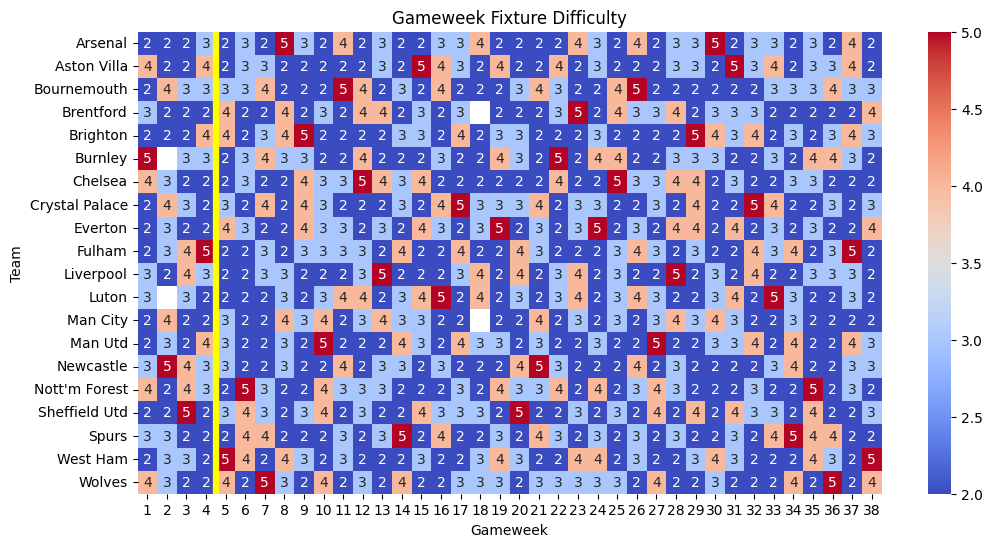

In [133]:
# Create a heatmap of the fixture difficulty
df = f.copy()

home_fixtures = df[['gameweek', 'team_name_h', 'team_h_difficulty']].rename(columns={'team_name_h': 'team_name', 'team_h_difficulty': 'difficulty'})
away_fixtures = df[['gameweek', 'team_name_a', 'team_a_difficulty']].rename(columns={'team_name_a': 'team_name', 'team_a_difficulty': 'difficulty'})
combined_fixtures = pd.concat([home_fixtures, away_fixtures])

heatmap_data = combined_fixtures.pivot(columns='gameweek', index='team_name', values='difficulty')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm', cbar=True)

# Add vertical line to show the current gameweek (modified to show next gameweek)
for idx, col in enumerate(heatmap_data.columns):
    if col == next_gameweek:
        plt.axvline(idx, color='yellow', linewidth=4.5, linestyle='solid')

plt.title('Gameweek Fixture Difficulty')
plt.xlabel('Gameweek')
plt.ylabel('Team')
plt.show()